# Data Set Information:

The data was collected retrospectively at Wroclaw Thoracic Surgery Centre for patients who underwent major lung resections for primary lung cancer in the years 2007-2011. The Centre is associated with the Department of Thoracic Surgery of the Medical University of Wroclaw and Lower-Silesian Centre for Pulmonary Diseases, Poland, while the research database constitutes a part of the National Lung Cancer Registry, administered by the Institute of Tuberculosis and Pulmonary Diseases in Warsaw, Poland.

Attribute Information:

1. DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1) - *nominal*
2. PRE4: Forced vital capacity - FVC - *numeric* 
3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 - *numeric*
4. PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0) - *nominal*
5. PRE7: Pain before surgery (T,F) - *boolean*
6. PRE8: Haemoptysis before surgery (T,F) - *boolean*
7. PRE9: Dyspnoea before surgery (T,F) - *boolean*
8. PRE10: Cough before surgery (T,F) - *boolean*
9. PRE11: Weakness before surgery (T,F) - *boolean*
10. PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13) - *ordinal*
11. PRE17: Type 2 DM - diabetes mellitus (T,F) - *boolean*
12. PRE19: MI up to 6 months (T,F) - *boolean*
13. PRE25: PAD - peripheral arterial diseases (T,F) - *boolean*
14. PRE30: Smoking (T,F) - *boolean*
15. PRE32: Asthma (T,F) - *boolean*
16. AGE: Age at surgery - *numeric*
17. Risk1Y (**CLASS**): 1 year survival period - (T)rue value if died (T,F)

# 1. Import the dataset

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict

In [13]:
df = pd.read_csv('/Users/marysia/Downloads/ThoraricSurgery (1).csv')
df

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


# 2. Exploratory analysis

In [14]:
df.head().T

,0,1,2,3,4
DGN,DGN2,DGN3,DGN3,DGN3,DGN3
PRE4,2.88,3.4,2.76,3.68,2.44
PRE5,2.16,1.88,2.08,3.04,0.96
PRE6,PRZ1,PRZ0,PRZ1,PRZ0,PRZ2
PRE7,F,F,F,F,F
PRE8,F,F,F,F,T
PRE9,F,F,F,F,F
PRE10,T,F,T,F,T
PRE11,T,F,F,F,T
PRE14,OC14,OC12,OC11,OC11,OC11


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN      470 non-null    object 
 1   PRE4     470 non-null    float64
 2   PRE5     470 non-null    float64
 3   PRE6     470 non-null    object 
 4   PRE7     470 non-null    object 
 5   PRE8     470 non-null    object 
 6   PRE9     470 non-null    object 
 7   PRE10    470 non-null    object 
 8   PRE11    470 non-null    object 
 9   PRE14    470 non-null    object 
 10  PRE17    470 non-null    object 
 11  PRE19    470 non-null    object 
 12  PRE25    470 non-null    object 
 13  PRE30    470 non-null    object 
 14  PRE32    470 non-null    object 
 15  AGE      470 non-null    int64  
 16  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(1), object(14)
memory usage: 62.5+ KB


- classification problem: the task consists in predicting the Risk1Yr value (nominal attribute)
    - 15 attributes
        - 3 numerical (PRE4, PRE5, AGE)
        - 12 categorical
    - 470 instances

In [16]:
df.isna().sum()

DGN        0
PRE4       0
PRE5       0
PRE6       0
PRE7       0
PRE8       0
PRE9       0
PRE10      0
PRE11      0
PRE14      0
PRE17      0
PRE19      0
PRE25      0
PRE30      0
PRE32      0
AGE        0
Risk1Yr    0
dtype: int64

- There are no NaN values

In [17]:
df.describe()

,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000
mean,3.281638,4.568702,62.534043
std,0.871395,11.767857,8.706902
min,1.440000,0.960000,21.000000
25%,2.600000,1.960000,57.000000
50%,3.160000,2.400000,62.000000
75%,3.807500,3.080000,69.000000
max,6.300000,86.300000,87.000000


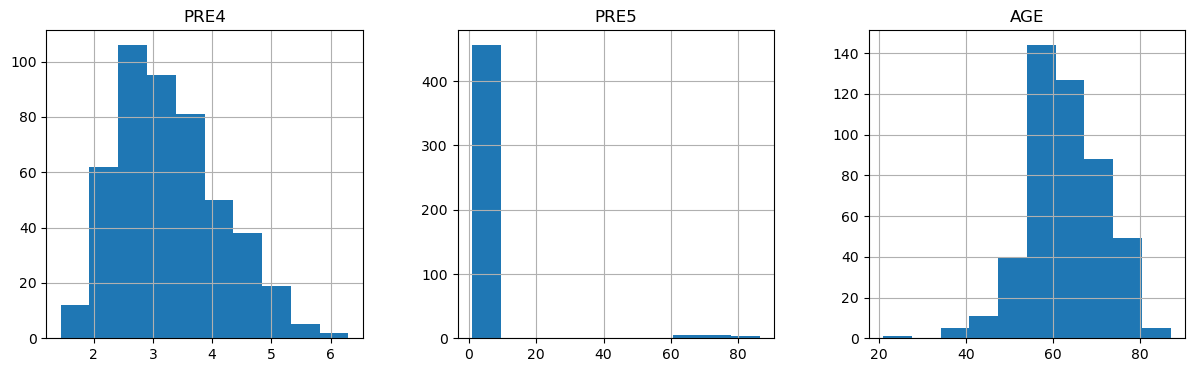

In [18]:
from matplotlib import pyplot as plt
df[['PRE4', 'PRE5', 'AGE']].hist(bins = 10,layout = (6,4),figsize = (20,30))
plt.show()

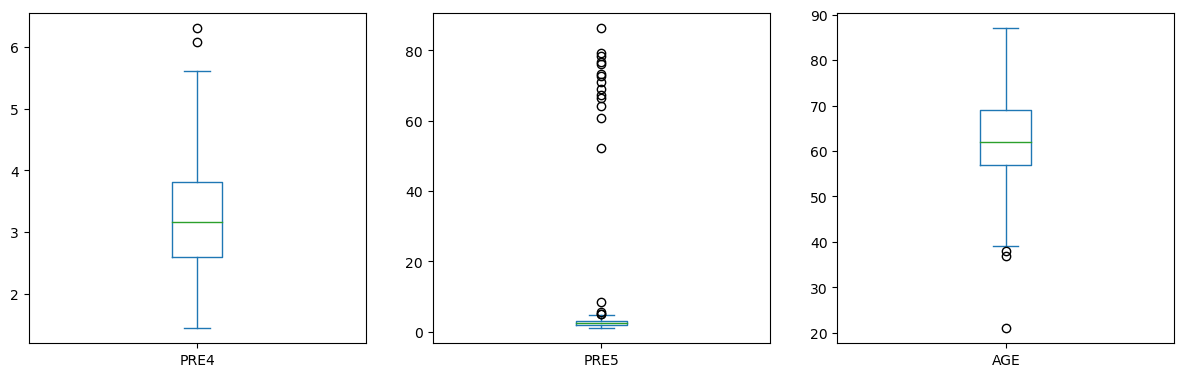

In [19]:
from matplotlib import pyplot as plt
df[['PRE4', 'PRE5', 'AGE']].plot(kind ='box', subplots = True, figsize=(20,30),layout = (6,4), )
plt.show()

Risk1Yr
F    400
T     70
Name: count, dtype: int64

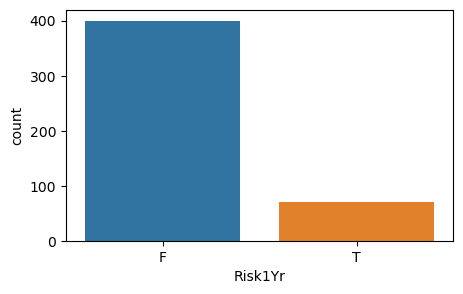

In [20]:
plt.figure(figsize = (5,3))
sns.countplot(data=df, x="Risk1Yr")#, hue="Risk1Yr")
df.Risk1Yr.value_counts()

In [21]:
70/470

0.14893617021276595

- The dataset is imbalanced: out of 470 patients, 70 died within 1 year after surgery (around 15%), whereas 400 lived.

The type of the attributes is inferred from the description of the dataset. Knowledge domain should help in refinement.

In [22]:
print([x for x in df.columns if df[x].dtype=='object'])
nominal = ['PRE6', 'DGN']
ordinal = ['PRE14']
boolean = ['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32']
numerical = ['PRE4', 'PRE5', 'AGE']

['DGN', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']


In [23]:
from pandas.api.types import CategoricalDtype
categories = CategoricalDtype(["OC11", "OC12", "OC13", "OC14"], ordered = True)
df['PRE14'] = df['PRE14'].astype(categories)

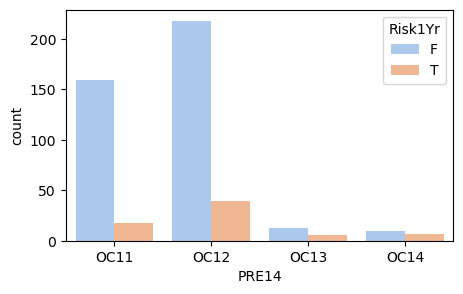

In [24]:
for col in ordinal:
    plt.figure(figsize = (5,3))
    sns.countplot(x=col, data=df, hue = "Risk1Yr", palette = "pastel")
    plt.show()

- At a glance, it seems that when the size of the tumor is larger (OC13, OC14) the proportion of death to live increases.

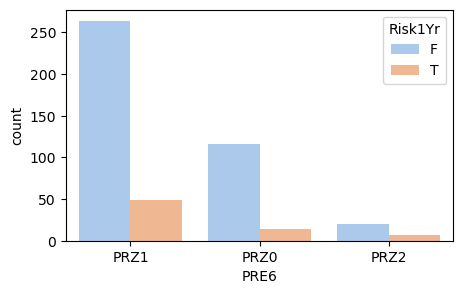

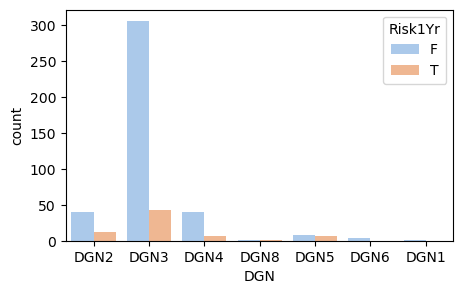

In [25]:
for col in nominal:
    plt.figure(figsize = (5,3))
    sns.countplot(x=col, data=df, hue = "Risk1Yr", palette = "pastel")
    plt.show()

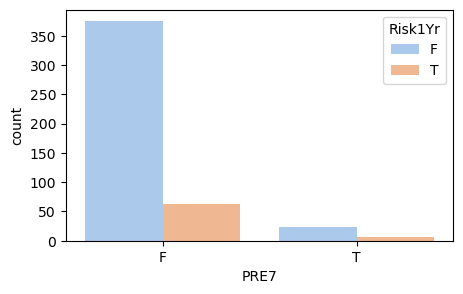

PRE7
F    439
T     31
Name: count, dtype: int64


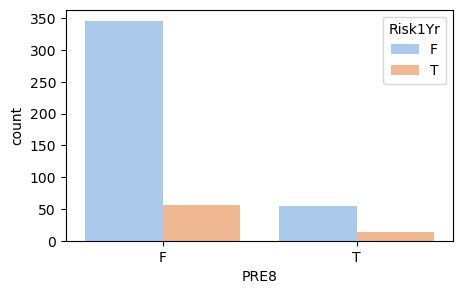

PRE8
F    402
T     68
Name: count, dtype: int64


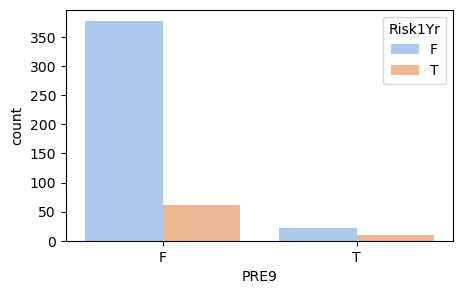

PRE9
F    439
T     31
Name: count, dtype: int64


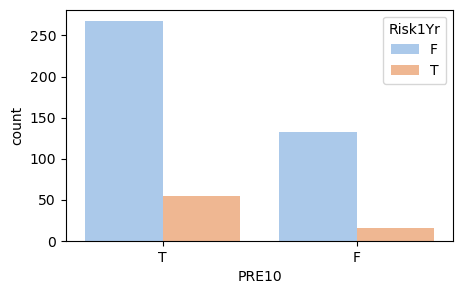

PRE10
T    323
F    147
Name: count, dtype: int64


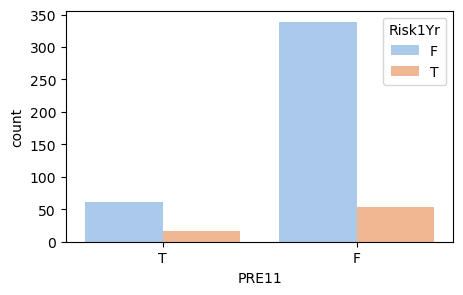

PRE11
F    392
T     78
Name: count, dtype: int64


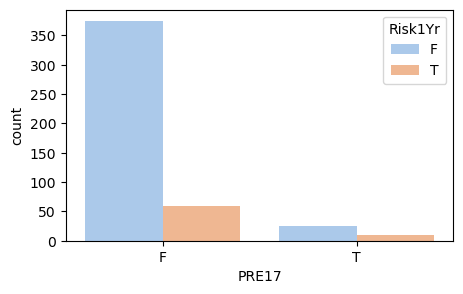

PRE17
F    435
T     35
Name: count, dtype: int64


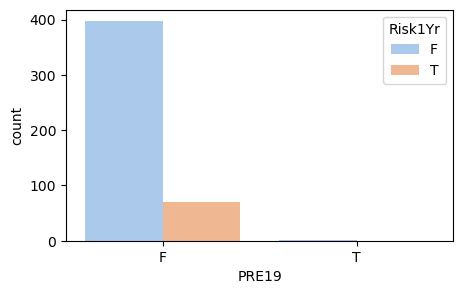

PRE19
F    468
T      2
Name: count, dtype: int64


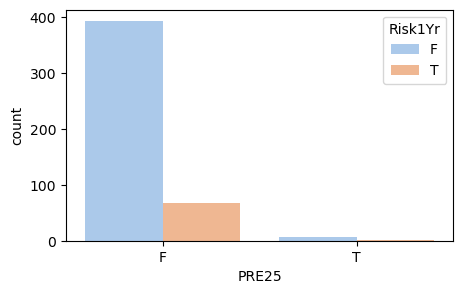

PRE25
F    462
T      8
Name: count, dtype: int64


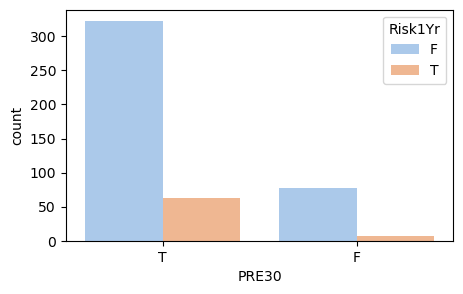

PRE30
T    386
F     84
Name: count, dtype: int64


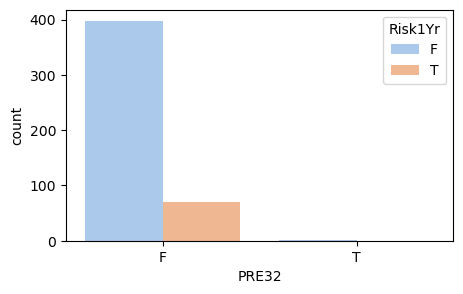

PRE32
F    468
T      2
Name: count, dtype: int64


In [26]:
for col in boolean:
    plt.figure(figsize = (5,3))
    sns.countplot(x=col, data=df, hue = "Risk1Yr", palette = "pastel")
    plt.show()
    print(df[col].value_counts())

# 3. Data preprocessing 
    - obtain a numeric representation of the categorical variables.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   PRE4       470 non-null    float64 
 1   PRE5       470 non-null    float64 
 2   PRE7       470 non-null    int64   
 3   PRE8       470 non-null    int64   
 4   PRE9       470 non-null    int64   
 5   PRE10      470 non-null    int64   
 6   PRE11      470 non-null    int64   
 7   PRE14      470 non-null    category
 8   PRE17      470 non-null    int64   
 9   PRE19      470 non-null    int64   
 10  PRE25      470 non-null    int64   
 11  PRE30      470 non-null    int64   
 12  PRE32      470 non-null    int64   
 13  AGE        470 non-null    int64   
 14  Risk1Yr    470 non-null    object  
 15  PRE6_PRZ0  470 non-null    int64   
 16  PRE6_PRZ1  470 non-null    int64   
 17  PRE6_PRZ2  470 non-null    int64   
 18  DGN_DGN1   470 non-null    int64   
 19  DGN_DGN2   470 non-null    in

In [41]:
boolean_columns = ['PRE6_PRZ0', 'PRE6_PRZ1', 'PRE6_PRZ2', 'DGN_DGN1', 'DGN_DGN2', 'DGN_DGN3', 'DGN_DGN4', 'DGN_DGN5', 'DGN_DGN6', 'DGN_DGN8']
df[] = df[boolean_columns].astype(int)
df

,PRE4,PRE5,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,...,PRE6_PRZ0,PRE6_PRZ1,PRE6_PRZ2,DGN_DGN1,DGN_DGN2,DGN_DGN3,DGN_DGN4,DGN_DGN5,DGN_DGN6,DGN_DGN8
0,2.88,2.16,0,0,0,1,1,4,0,0,...,0,1,0,0,1,0,0,0,0,0
1,3.40,1.88,0,0,0,0,0,2,0,0,...,1,0,0,0,0,1,0,0,0,0
2,2.76,2.08,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,3.68,3.04,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2.44,0.96,0,1,0,1,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,3.88,2.12,0,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0,0,0
466,3.76,3.12,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
467,3.04,2.08,0,0,0,1,0,3,0,0,...,0,1,0,0,0,1,0,0,0,0
468,1.96,1.68,0,0,0,1,1,2,0,0,...,0,1,0,0,0,1,0,0,0,0


In [28]:
df

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


In [29]:
df = pd.get_dummies(df,columns = nominal)
df 

,PRE4,PRE5,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,...,PRE6_PRZ0,PRE6_PRZ1,PRE6_PRZ2,DGN_DGN1,DGN_DGN2,DGN_DGN3,DGN_DGN4,DGN_DGN5,DGN_DGN6,DGN_DGN8
0,2.88,2.16,F,F,F,T,T,OC14,F,F,...,False,True,False,False,True,False,False,False,False,False
1,3.40,1.88,F,F,F,F,F,OC12,F,F,...,True,False,False,False,False,True,False,False,False,False
2,2.76,2.08,F,F,F,T,F,OC11,F,F,...,False,True,False,False,False,True,False,False,False,False
3,3.68,3.04,F,F,F,F,F,OC11,F,F,...,True,False,False,False,False,True,False,False,False,False
4,2.44,0.96,F,T,F,T,T,OC11,F,F,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,3.88,2.12,F,F,F,T,F,OC13,F,F,...,False,True,False,False,True,False,False,False,False,False
466,3.76,3.12,F,F,F,F,F,OC11,F,F,...,True,False,False,False,False,True,False,False,False,False
467,3.04,2.08,F,F,F,T,F,OC13,F,F,...,False,True,False,False,False,True,False,False,False,False
468,1.96,1.68,F,F,F,T,T,OC12,F,F,...,False,True,False,False,False,True,False,False,False,False


In [30]:
PRE14_dict = {'OC11':1, 'OC12':2, 'OC13':3, 'OC14':4}
df['PRE14'] = df['PRE14'].apply(lambda x: PRE14_dict[x])
df

,PRE4,PRE5,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,...,PRE6_PRZ0,PRE6_PRZ1,PRE6_PRZ2,DGN_DGN1,DGN_DGN2,DGN_DGN3,DGN_DGN4,DGN_DGN5,DGN_DGN6,DGN_DGN8
0,2.88,2.16,F,F,F,T,T,4,F,F,...,False,True,False,False,True,False,False,False,False,False
1,3.40,1.88,F,F,F,F,F,2,F,F,...,True,False,False,False,False,True,False,False,False,False
2,2.76,2.08,F,F,F,T,F,1,F,F,...,False,True,False,False,False,True,False,False,False,False
3,3.68,3.04,F,F,F,F,F,1,F,F,...,True,False,False,False,False,True,False,False,False,False
4,2.44,0.96,F,T,F,T,T,1,F,F,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,3.88,2.12,F,F,F,T,F,3,F,F,...,False,True,False,False,True,False,False,False,False,False
466,3.76,3.12,F,F,F,F,F,1,F,F,...,True,False,False,False,False,True,False,False,False,False
467,3.04,2.08,F,F,F,T,F,3,F,F,...,False,True,False,False,False,True,False,False,False,False
468,1.96,1.68,F,F,F,T,T,2,F,F,...,False,True,False,False,False,True,False,False,False,False


In [31]:
bool_dict = {'T':1, 'F':0}
for col in boolean:
    df[col] = df[col].apply(lambda x: bool_dict[x])
df

,PRE4,PRE5,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,...,PRE6_PRZ0,PRE6_PRZ1,PRE6_PRZ2,DGN_DGN1,DGN_DGN2,DGN_DGN3,DGN_DGN4,DGN_DGN5,DGN_DGN6,DGN_DGN8
0,2.88,2.16,0,0,0,1,1,4,0,0,...,False,True,False,False,True,False,False,False,False,False
1,3.40,1.88,0,0,0,0,0,2,0,0,...,True,False,False,False,False,True,False,False,False,False
2,2.76,2.08,0,0,0,1,0,1,0,0,...,False,True,False,False,False,True,False,False,False,False
3,3.68,3.04,0,0,0,0,0,1,0,0,...,True,False,False,False,False,True,False,False,False,False
4,2.44,0.96,0,1,0,1,1,1,0,0,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,3.88,2.12,0,0,0,1,0,3,0,0,...,False,True,False,False,True,False,False,False,False,False
466,3.76,3.12,0,0,0,0,0,1,0,0,...,True,False,False,False,False,True,False,False,False,False
467,3.04,2.08,0,0,0,1,0,3,0,0,...,False,True,False,False,False,True,False,False,False,False
468,1.96,1.68,0,0,0,1,1,2,0,0,...,False,True,False,False,False,True,False,False,False,False


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   PRE4       470 non-null    float64 
 1   PRE5       470 non-null    float64 
 2   PRE7       470 non-null    int64   
 3   PRE8       470 non-null    int64   
 4   PRE9       470 non-null    int64   
 5   PRE10      470 non-null    int64   
 6   PRE11      470 non-null    int64   
 7   PRE14      470 non-null    category
 8   PRE17      470 non-null    int64   
 9   PRE19      470 non-null    int64   
 10  PRE25      470 non-null    int64   
 11  PRE30      470 non-null    int64   
 12  PRE32      470 non-null    int64   
 13  AGE        470 non-null    int64   
 14  Risk1Yr    470 non-null    object  
 15  PRE6_PRZ0  470 non-null    bool    
 16  PRE6_PRZ1  470 non-null    bool    
 17  PRE6_PRZ2  470 non-null    bool    
 18  DGN_DGN1   470 non-null    bool    
 19  DGN_DGN2   470 non-null    bo

In [33]:
df.head().T

,0,1,2,3,4
PRE4,2.88,3.4,2.76,3.68,2.44
PRE5,2.16,1.88,2.08,3.04,0.96
PRE7,0,0,0,0,0
PRE8,0,0,0,0,1
PRE9,0,0,0,0,0
PRE10,1,0,1,0,1
PRE11,1,0,0,0,1
PRE14,4,2,1,1,1
PRE17,0,0,0,0,0
PRE19,0,0,0,0,0


# 4. Classification analysis
- 5-fold cross-validation procedure on the dataset to identify the most suitable configuration among the following
    - DecisionTree (default params), no rebalancing
    - DecisionTree (default params) after undersampling with $\gamma$ ranging from 0.3 to 1.0 with a step of 0.1 (NOTE: $\gamma$ is the ratio between the number of samples in the minority class over the number of samples in the majority class) 

In [42]:
X = df.drop("Risk1Yr", axis=1)
y = df['Risk1Yr']

In [43]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

In [44]:
def eval_cross_validation(pipeline, X, y):
    list_df = []
    list_accuracy = []
    for train, val in skf.split(X, y):
        # fit and predict using pipeline
        X_tr = X.values[train]
        y_tr = y.values[train]
        X_val = X.values[val]
        y_val = y.values[val]
        pipeline.fit(X_tr,y_tr)
        y_pred = pipeline.predict(X_val)
        # compute classification report
        cr = classification_report(y_val,y_pred,output_dict = True)
        # store accuracy
        list_accuracy.append(cr['accuracy'])
        # store per-class metrics as a dataframe
        df = pd.DataFrame({k:v for k,v in cr.items() if k!='accuracy'})
        list_df.append(df)
    
    # compute average per-class metrics    
    df_concat = pd.concat(list_df)
    by_row_index = df_concat.groupby(df_concat.index)
    df_avg = by_row_index.mean()

    # compute average accuracy
    accuracy_avg = np.mean(list_accuracy)
    
    return df_avg, accuracy_avg

accuracy 0.7553191489361702


,F,T,macro avg,weighted avg
f1-score,0.852311,0.247111,0.549711,0.762175
precision,0.871876,0.246345,0.559110,0.778712
recall,0.837500,0.285714,0.561607,0.755319
support,80.000000,14.000000,94.000000,94.000000


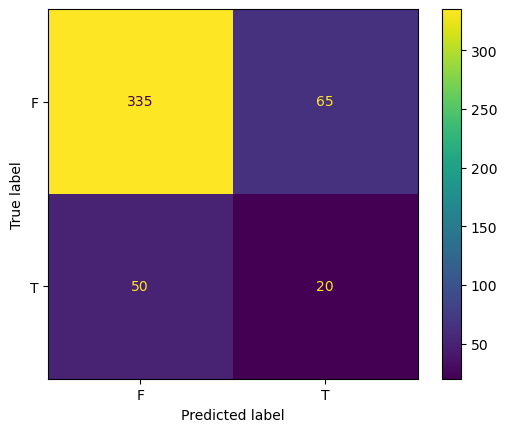

In [45]:
estimators = [('clf', DecisionTreeClassifier(random_state=123))]
pipe = Pipeline(estimators)
df_metrics, acc = eval_cross_validation(pipe, X, y)
print('accuracy',acc)
display(df_metrics)
y_pred = cross_val_predict(pipe, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.show()

If no rebalancing is applied the recall on the positive class (died within 1 year) is low (0.28 on average). The precision is low as well (around 0.18).

0.3
accuracy 0.723404255319149


,F,T,macro avg,weighted avg
f1-score,0.830679,0.238019,0.534349,0.742410
precision,0.867540,0.199031,0.533286,0.767975
recall,0.797500,0.300000,0.548750,0.723404
support,80.000000,14.000000,94.000000,94.000000


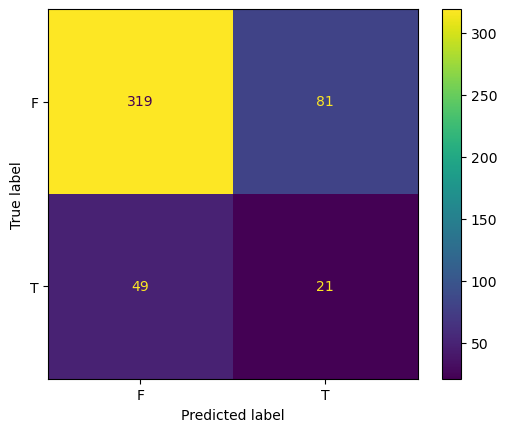

0.4
accuracy 0.6787234042553192


,F,T,macro avg,weighted avg
f1-score,0.797343,0.211797,0.504570,0.710134
precision,0.859711,0.165734,0.512723,0.756353
recall,0.745000,0.300000,0.522500,0.678723
support,80.000000,14.000000,94.000000,94.000000


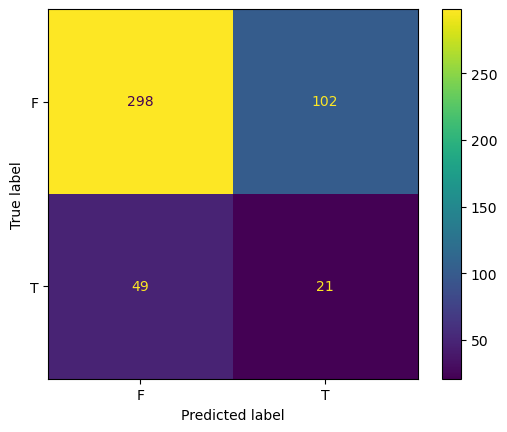

0.5
accuracy 0.648936170212766


,F,T,macro avg,weighted avg
f1-score,0.767956,0.262510,0.515233,0.692677
precision,0.874249,0.191171,0.532710,0.772514
recall,0.687500,0.428571,0.558036,0.648936
support,80.000000,14.000000,94.000000,94.000000


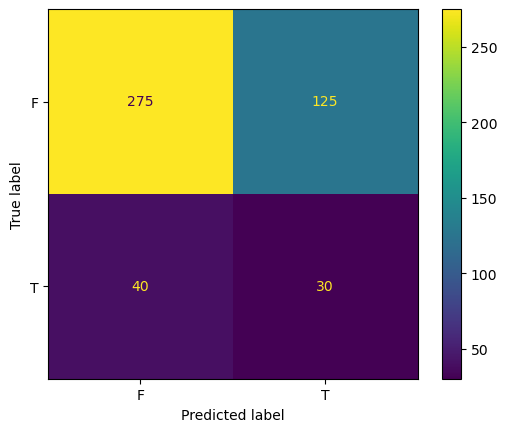

0.6
accuracy 0.6340425531914894


,F,T,macro avg,weighted avg
f1-score,0.754711,0.266729,0.510720,0.682033
precision,0.876432,0.189775,0.533104,0.774164
recall,0.665000,0.457143,0.561071,0.634043
support,80.000000,14.000000,94.000000,94.000000


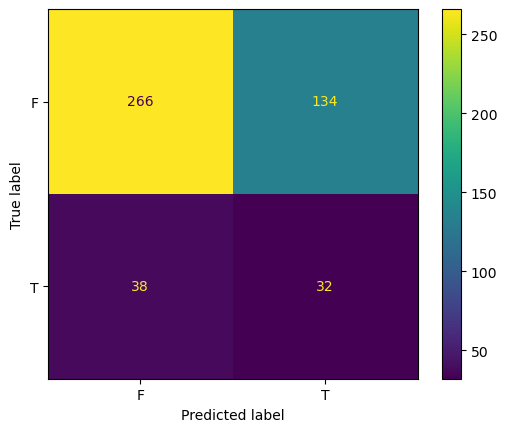

0.7
accuracy 0.5914893617021276


,F,T,macro avg,weighted avg
f1-score,0.713876,0.278373,0.496125,0.649014
precision,0.879934,0.189891,0.534913,0.777162
recall,0.602500,0.528571,0.565536,0.591489
support,80.000000,14.000000,94.000000,94.000000


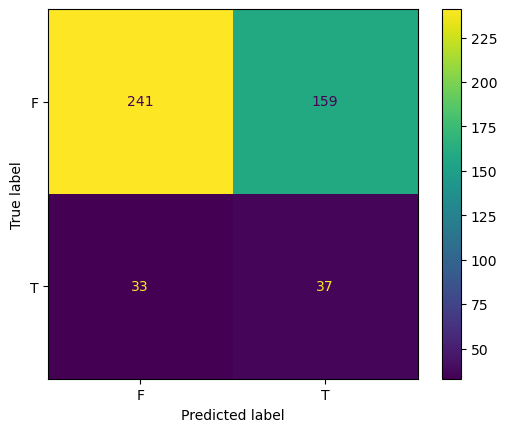

0.8
accuracy 0.5702127659574467


,F,T,macro avg,weighted avg
f1-score,0.698078,0.246418,0.472248,0.630809
precision,0.863835,0.167492,0.515664,0.760124
recall,0.587500,0.471429,0.529464,0.570213
support,80.000000,14.000000,94.000000,94.000000


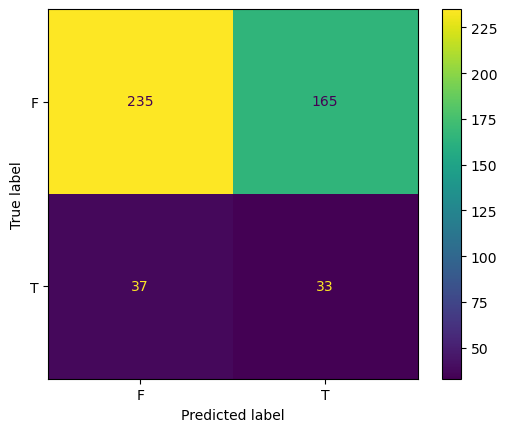

0.9
accuracy 0.5212765957446809


,F,T,macro avg,weighted avg
f1-score,0.654071,0.216460,0.435265,0.588895
precision,0.845421,0.143678,0.494550,0.740906
recall,0.535000,0.442857,0.488929,0.521277
support,80.000000,14.000000,94.000000,94.000000


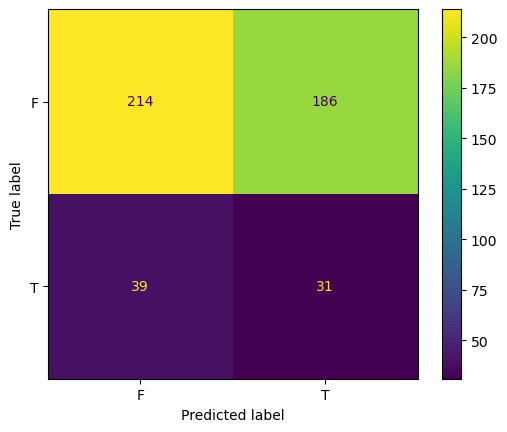

1.0
accuracy 0.5148936170212767


,F,T,macro avg,weighted avg
f1-score,0.643495,0.230966,0.437230,0.582054
precision,0.851100,0.152122,0.501611,0.746997
recall,0.520000,0.485714,0.502857,0.514894
support,80.000000,14.000000,94.000000,94.000000


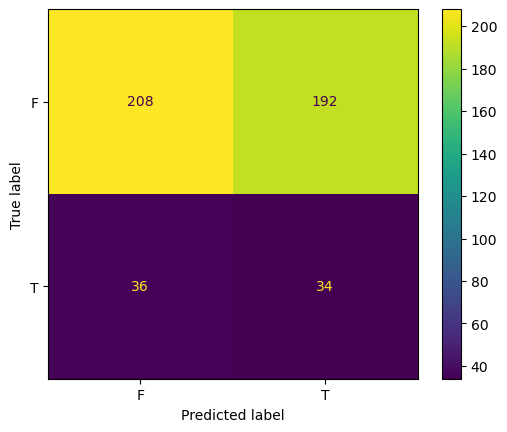

In [46]:
precision_T_list = []
recall_T_list = []
fscore_T_list = []
for fraction in range(3,11):
    frac = fraction/10
    print(frac)
    estimators = [('RUS', RandomUnderSampler(sampling_strategy=frac,random_state=123)), 
                  ('clf', DecisionTreeClassifier(random_state=123))
                 ]

    pipe = Pipeline(estimators)
    df_metrics, acc = eval_cross_validation(pipe, X, y)
    print('accuracy',acc)
    display(df_metrics)
    y_pred = cross_val_predict(pipe, X, y, cv=skf)
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.show()
    precision_T_list.append(df_metrics.loc['precision','T'])
    recall_T_list.append(df_metrics.loc['recall','T'])
    fscore_T_list.append(df_metrics.loc['f1-score','T'])

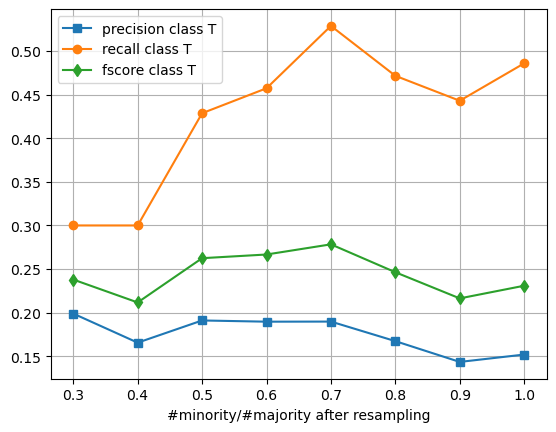

In [47]:
plt.plot(np.arange(0.3,1.01,0.1),precision_T_list, 's-', label = 'precision class T')
plt.plot(np.arange(0.3,1.01,0.1),recall_T_list,'o-',label = 'recall class T')
plt.plot(np.arange(0.3,1.01,0.1),fscore_T_list,'d-',label = 'fscore class T')
plt.legend()
plt.xlabel('#minority/#majority after resampling')
plt.grid()
plt.show()

The adoption of RandomUnderSampling as rebalancing technique allows improving the **recall on the positive class** (died within 1 year after surgery). The maximum value (around 0.5) is achieved for a **sampling factor=0.7** (ratio between minority and majority class after resampling).

However the **precision on the positive class** decreases from around 0.24 with no rebalancing to around 0.2 when random under sampling is applied with **sampling factor=0.7**.

The maximum value of **F1-score** (around 0.27) is achieved for sampling **factor=0.7**.

# 5. Interpretability

In [48]:
from sklearn.tree import plot_tree, export_text

In [49]:
estimators = [('smote', RandomUnderSampler(sampling_strategy=0.7,random_state=123)), 
              ('clf', DecisionTreeClassifier(random_state=123))]
pipe = Pipeline(estimators)
pipe.fit(X,y)

Pipeline(steps=[('smote',
                 RandomUnderSampler(random_state=123, sampling_strategy=0.7)),
                ('clf', DecisionTreeClassifier(random_state=123))])

In [50]:
pipe[0]

RandomUnderSampler(random_state=123, sampling_strategy=0.7)

In [51]:
X_new, y_new = pipe[0].fit_resample(X,y)
print(pd.Series(y_new).value_counts())

Risk1Yr
F    100
T     70
Name: count, dtype: int64


In [ ]:
plt.figure(figsize = (30,30))
plot_tree(pipe[1],feature_names = X.columns.tolist())
plt.show()

In [55]:
X.columns

Index(['PRE4', 'PRE5', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE14',
       'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE', 'PRE6_PRZ0',
       'PRE6_PRZ1', 'PRE6_PRZ2', 'DGN_DGN1', 'DGN_DGN2', 'DGN_DGN3',
       'DGN_DGN4', 'DGN_DGN5', 'DGN_DGN6', 'DGN_DGN8'],
      dtype='object')

In [57]:
text_representation = export_text(pipe[1], feature_names = list(X.columns))
print(text_representation)

|--- PRE17 <= 0.50
|   |--- PRE14 <= 2.50
|   |   |--- PRE5 <= 3.85
|   |   |   |--- DGN_DGN3 <= 0.50
|   |   |   |   |--- PRE5 <= 1.94
|   |   |   |   |   |--- AGE <= 70.00
|   |   |   |   |   |   |--- PRE4 <= 2.88
|   |   |   |   |   |   |   |--- class: T
|   |   |   |   |   |   |--- PRE4 >  2.88
|   |   |   |   |   |   |   |--- class: F
|   |   |   |   |   |--- AGE >  70.00
|   |   |   |   |   |   |--- class: F
|   |   |   |   |--- PRE5 >  1.94
|   |   |   |   |   |--- DGN_DGN4 <= 0.50
|   |   |   |   |   |   |--- PRE4 <= 3.12
|   |   |   |   |   |   |   |--- PRE6_PRZ0 <= 0.50
|   |   |   |   |   |   |   |   |--- PRE5 <= 2.04
|   |   |   |   |   |   |   |   |   |--- class: T
|   |   |   |   |   |   |   |   |--- PRE5 >  2.04
|   |   |   |   |   |   |   |   |   |--- class: F
|   |   |   |   |   |   |   |--- PRE6_PRZ0 >  0.50
|   |   |   |   |   |   |   |   |--- class: T
|   |   |   |   |   |   |--- PRE4 >  3.12
|   |   |   |   |   |   |   |--- class: T
|   |   |   |   |   |--- DGN_DGN

A short rule with positive prediction, using the real meaning of the variables: IF PRE17 > 0.50 (diabete mellitus = T) and
- PRE4 > 1.92 (Forced vital capacity) and
- AGE > 56.00 THEN class: T (Risk1Yr)